# Race-to-Race Consistency Analysis in 2022 Season (Drivers)

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [15]:
results = pd.read_csv('archive/results.csv')
drivers = pd.read_csv('archive/drivers.csv')
races = pd.read_csv('archive/races.csv')
results.head()
results_f = pd.merge(results, races[['raceId', 'year', 'name']], on='raceId')
results_f = pd.merge(results_f[results_f['year']==2022], drivers[['driverId', 'surname']], on='driverId')
results_f.head()


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,year,name,surname
0,25406,1074,844,6,16,1,1,1,1,26.0,...,1:37:33.584,5853584,51,1,1:34.570,206.018,1,2022,Bahrain Grand Prix,Leclerc
1,25407,1074,832,6,55,3,2,2,2,18.0,...,+5.598,5859182,52,3,1:35.740,203.501,1,2022,Bahrain Grand Prix,Sainz
2,25408,1074,1,131,44,5,3,3,3,15.0,...,+9.675,5863259,53,5,1:36.228,202.469,1,2022,Bahrain Grand Prix,Hamilton
3,25409,1074,847,131,63,9,4,4,4,12.0,...,+11.211,5864795,56,6,1:36.302,202.313,1,2022,Bahrain Grand Prix,Russell
4,25410,1074,825,210,20,7,5,5,5,10.0,...,+14.754,5868338,53,8,1:36.623,201.641,1,2022,Bahrain Grand Prix,Magnussen


##Consistency in Positions of All Drivers in the 2022 Season

In [25]:
driver_pos = results_f.replace([np.inf, -np.inf], np.nan).groupby(['surname', 'name'])['positionOrder'].min().reset_index()
driver_pos.head()

,surname,name,positionOrder
0,Albon,Abu Dhabi Grand Prix,13
1,Albon,Australian Grand Prix,10
2,Albon,Austrian Grand Prix,12
3,Albon,Azerbaijan Grand Prix,12
4,Albon,Bahrain Grand Prix,13


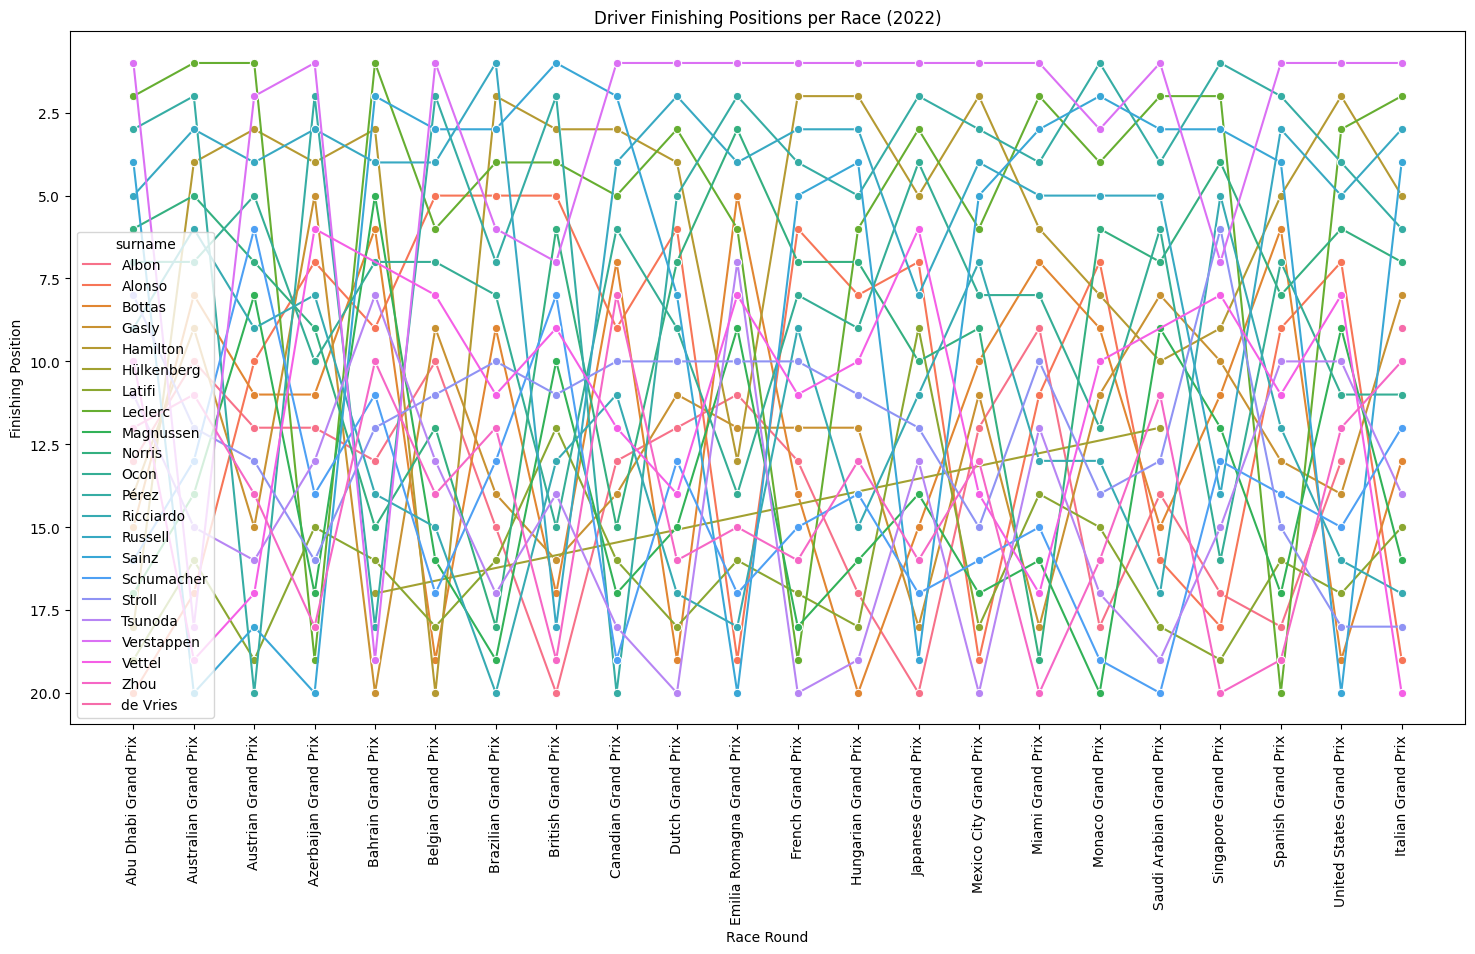

In [ ]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    
    plt.figure(figsize=(18,9))
    sns.lineplot(data=driver_pos, x='name', y='positionOrder', hue='surname', marker='o')
    plt.gca().invert_yaxis()  # lower = better
    plt.title(f"Driver Finishing Positions per Race (2022)")
    plt.ylabel("Finishing Position")
    plt.xlabel("Race Round")
    plt.xticks(rotation=90)
    plt.show()

In [32]:
consistency = driver_pos.groupby('surname')['positionOrder'].std().reset_index(name='position_std').sort_values('position_std')

print(consistency)

       surname  position_std
6       Latifi      2.389099
16      Stroll      3.015472
10        Ocon      3.166724
0        Albon      3.238900
15  Schumacher      3.361676
20        Zhou      3.469409
5   Hülkenberg      3.535534
3        Gasly      3.647925
13     Russell      3.866831
17     Tsunoda      3.923787
8    Magnussen      4.085928
19      Vettel      4.135533
12   Ricciardo      4.171901
9       Norris      4.363614
2       Bottas      4.780009
4     Hamilton      5.112797
18  Verstappen      5.244044
1       Alonso      5.462386
7      Leclerc      5.869615
11       Pérez      5.885083
14       Sainz      7.434126
21    de Vries           NaN


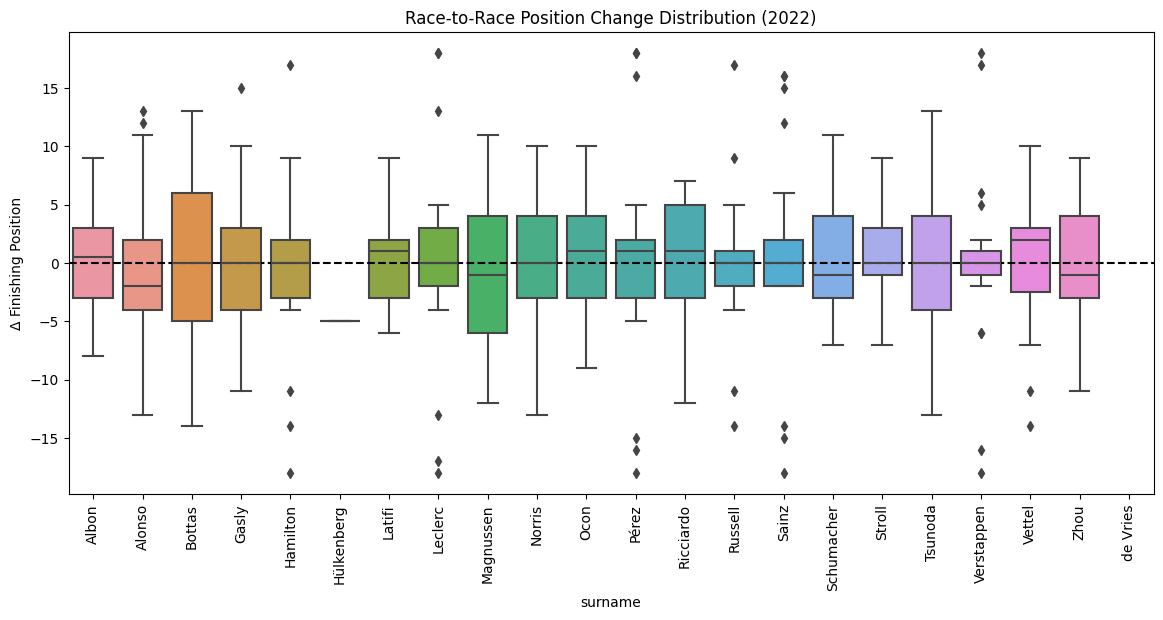

In [35]:
driver_pos['change'] = driver_pos.groupby('surname')['positionOrder'].diff()

plt.figure(figsize=(14,6))
sns.boxplot(data=driver_pos, x='surname', y='change')
plt.axhline(0, color="black", linestyle="--")
plt.title(f"Race-to-Race Position Change Distribution (2022)")
plt.ylabel("Δ Finishing Position")
plt.xticks(rotation=90)
plt.show()

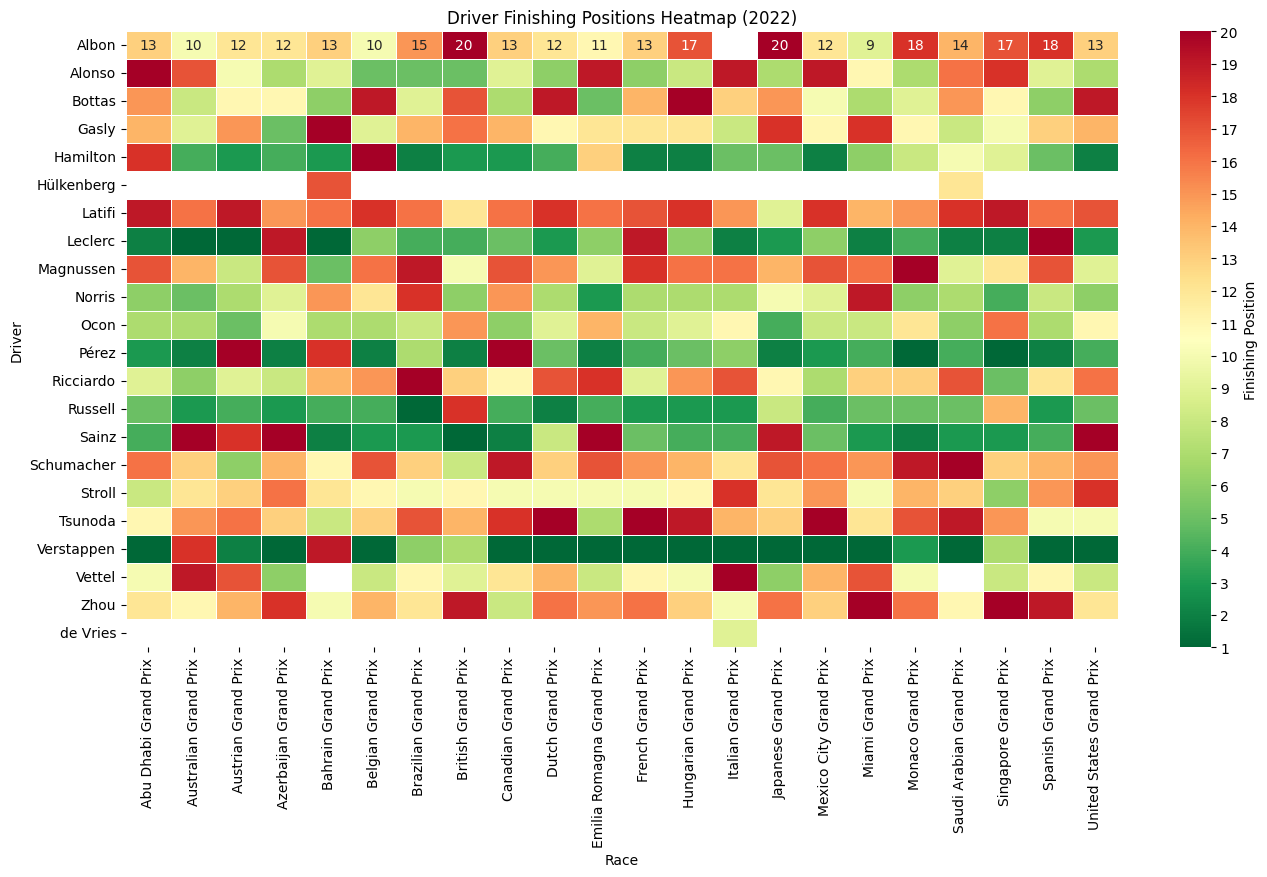

In [49]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    driver_pivot = driver_pos.pivot(index='surname', columns='name', values='positionOrder')

    plt.figure(figsize=(16,8))
    ax = sns.heatmap(driver_pivot, cmap="RdYlGn_r", cbar_kws={'label': 'Finishing Position'}, linewidths=0.5, annot=True, fmt=".0f", vmin=1, vmax=20)
    colorbar = ax.collections[0].colorbar
    colorbar.set_ticks(np.arange(1, 21, 1))
    colorbar.set_ticklabels([str(i) for i in range(1,21)])
    plt.title(f"Driver Finishing Positions Heatmap (2022)")
    plt.ylabel("Driver")
    plt.xlabel("Race")
    plt.show()